In [20]:
import pandas as pd #import relevant libraries for analysis. Pandas helps handle csv files as data frames
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [15]:
#read the file and definee the names of each column title
names1994 = pd.read_csv('/home/mariotury/Desktop/DataScience/Resources/SampleData/Py4Analysis/names/yob1994.txt', names=['name', 'sex', 'births'])
names1994

,name,sex,births
0,Jessica,F,32118
1,Ashley,F,30279
2,Emily,F,24149
3,Samantha,F,22818
4,Sarah,F,22289
5,Taylor,F,20732
6,Brittany,F,18899
7,Amanda,F,18717
8,Elizabeth,F,16779
9,Megan,F,16579


In [21]:
#Grouping the sum of all births by sex
names1994.groupby('sex').births.sum()

sex
F    1785246
M    1931383
Name: births, dtype: int64

In [22]:
# Creating a pivot table of total births by sex and year
total_births = names.pivot_table('births',index='year', columns='sex', aggfunc=sum )
total_births.tail() #shows the last 5 rows

sex,F,M
year,,
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211
2016,1756647,1880674


In [23]:
#Since the data is split into many files.
#Lets try to aggregate all the files into one dataframe using pandas.concat

years = range(1880, 2017)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = '/home/mariotury/Desktop/DataScience/Resources/SampleData/Py4Analysis/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


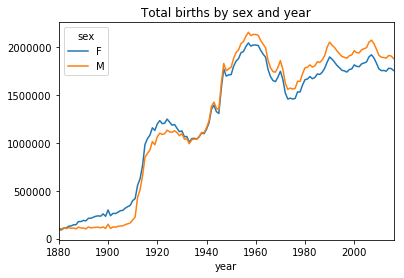

In [24]:
total_births.plot(title='Total births by sex and year')

In [25]:
# insert a column prop with the fraction of babies given each name relative to
# the total number of births.
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [ ]:
# use np.allclose to check that the group sums are sufficiently close to (but
# perhaps not exactly equal to) 1
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

In [27]:
# the top 1000 names for each sex/year combination.
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2016 M   1878753      Keanu   M     210  2016  0.000112
         1878754     Konner   M     210  2016  0.000112
         1878755      Brent   M     209  2016  0.000111
         1878756   Immanuel   M     209  2016  0.000111
         1878757    Benicio   M     208  2016  0.000111
         1878758     Ernest   M     208  2016  0.000111
         1878759    Merrick   M     208  2016  0.000111
         1878760    Yisroel   M     208  2016  0.000111
         1878763       Lyle   M     207  2016  0.000110
         1878761      Amare   M     207  2016  0.000110
         1878762        Jad   M     207  2016  0.000110
         1878766     Maddux   M     206  2016  0.000110
         1878764      Creed   M     206  2016  0.000110
         1878765      Krish   M     206  2016  0.000110
         1878768  Giancarlo   M     205  2016  0.000109
         1878769   Jamarion   M     205  2016  0.000109
         1878770      Steve   M     205  2016  0.000109
         1878767     Camilo   M     205  2016  0.000109
         1878771      Anton   M     204  2016  0.000108
         1878772      Jamar   M     204  2016  0.000108
         1878773   Jeremias   M     204  2016  0.000108
         1878774      Ralph   M     204  2016  0.000108
         1878775     Wesson   M     204  2016  0.000108
         1878778    Brenden   M     203  2016  0.000108
         1878779    Eliezer   M     203  2016  0.000108
         1878777    Braeden   M     203  2016  0.000108
         1878776       Bode   M     203  2016  0.000108
         1878780     Davian   M     202  2016  0.000107
         1878781        Gus   M     202  2016  0.000107
         1878782   Jonathon   M     202  2016  0.000107

[273877 rows x 5 columns]

In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

boys

In [ ]:
girls

In [28]:
# Simple time series, like the number of Johns or Marys for each year can be plotted 
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

total_births

/home/mariotury/anaconda2/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa09d6a9210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa09d6e6150>], dtype=object)

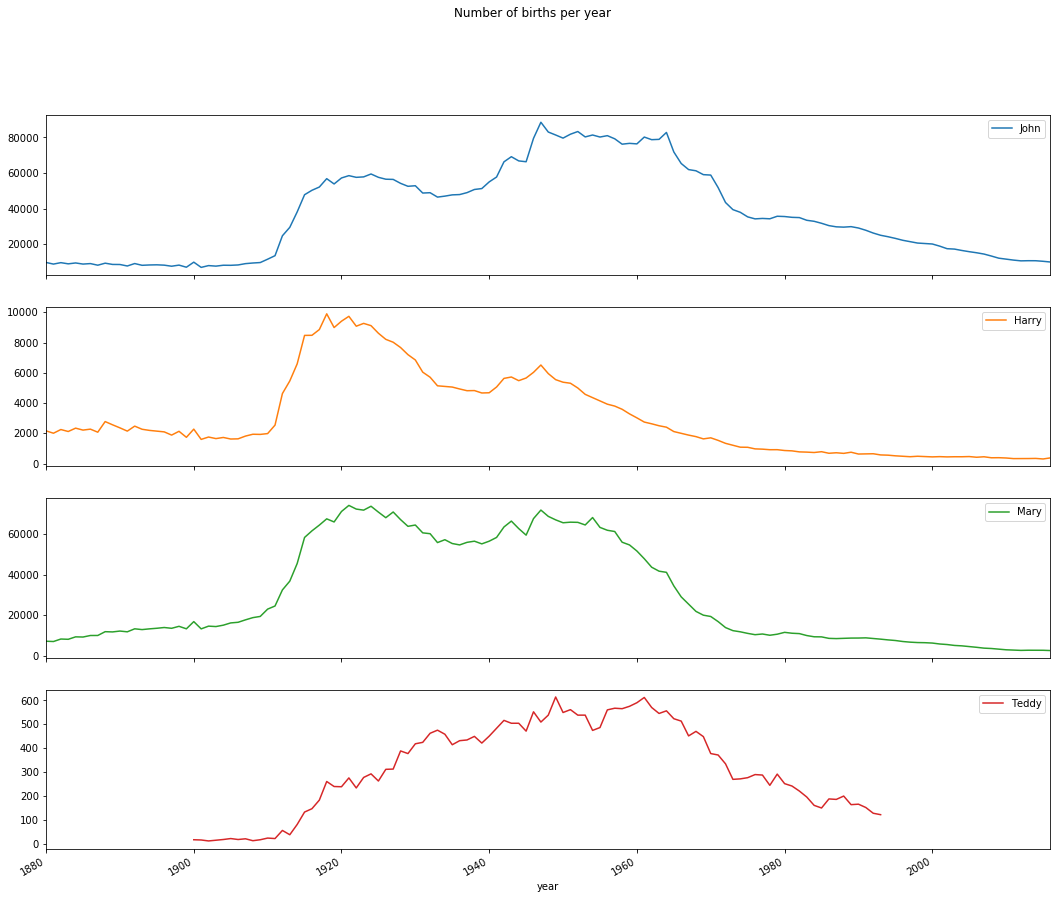

In [29]:
subset = total_births[['John', 'Harry', 'Mary', 'Teddy']]
subset.plot(subplots=True, figsize=(18, 15), grid=False,title="Number of births per year")